# <center>CROP RECOMMENDATION/PREDICTION MODEL</center>

In [4]:
pip install seaborn pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

C:\Users\maste\AppData\Local\Temp\ipykernel_37112\2945004344.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('../data/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploratory Data Analysis

### Checking null/missing values

In [10]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<h4> <u>Let's have a closer look at the distribution of temperature and ph.</u><br><br>
    
It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!</h4>

<Axes: xlabel='ph', ylabel='Density'>

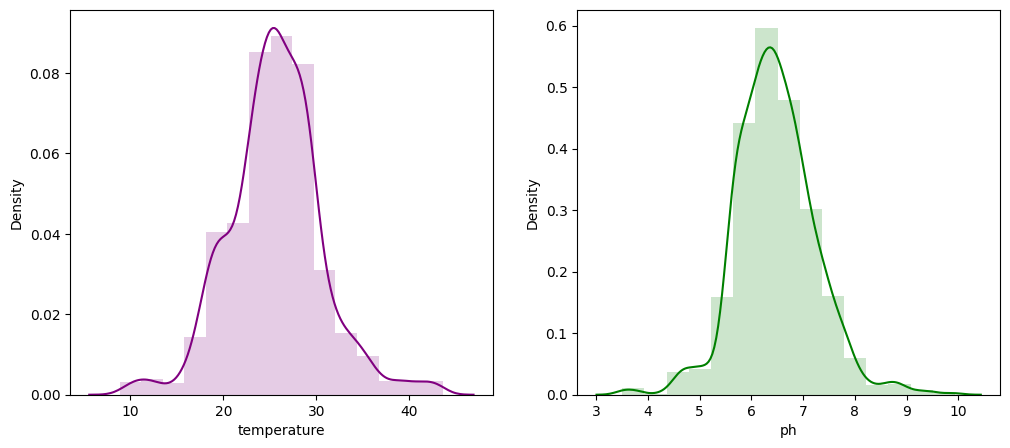

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

<h4> A quick check if the dataset is balanced or not. If found imbalanced, we would have to downsample some targets which are more in quantity but so far everything looks good! <h4>

<Axes: xlabel='count', ylabel='label'>

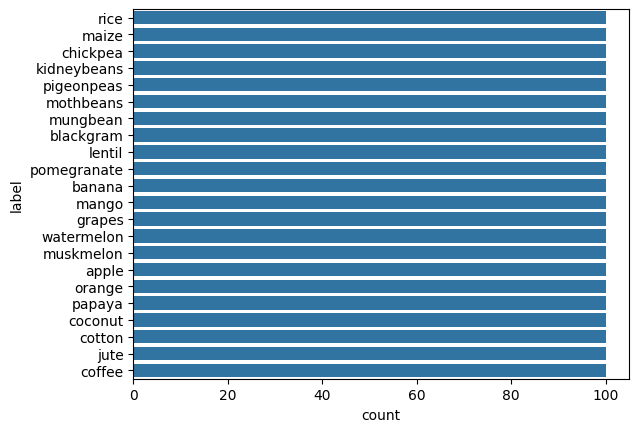

In [7]:
sns.countplot(y='label',data=df)

# Interactive Python Widgets for Exploratory Analysis 

In [43]:
import ipywidgets as widgets # for creating interactive widgets

## Scatter plot Interactive Widget

#### Select different values from the dropdown menu given to see different comparisons. Also, checkbox to colorful visualization is provided.

In [44]:
# Scatter Plot Widget
def create_scatter_chart(ing1, ing2, color_encode):
    with plt.style.context("fivethirtyeight"): 
        fig = plt.figure(figsize=(15,8))
        if color_encode:
            sns.scatterplot(data=df, x=ing1, y=ing2, hue="label", edgecolors="black", s=70)
            plt.legend(loc="best", ncol=df["label"].unique().size/7)
        else:
            sns.scatterplot(data=df, x=ing1, y=ing2, c="dodgerblue", edgecolors="black", s=70)
        plt.xlabel(ing1.capitalize())
        plt.ylabel(ing2.capitalize())
        plt.title("{} vs {}".format(ing1[:10].capitalize(), ing2[:10].capitalize()), loc="left", fontsize=15)
        plt.show()

drop1 = widgets.Dropdown(description="X-Axis", options=df.columns, index=0, layout=widgets.Layout(width="220px"))
drop2 = widgets.Dropdown(description="Y-Axis", options=df.columns, index=1, layout=widgets.Layout(width="220px"))

color_encode = widgets.Checkbox(description="Color_Encode")

scatter_chart = widgets.interactive_output(create_scatter_chart, {"ing1": drop1, "ing2": drop2, "color_encode": color_encode})
type(scatter_chart)

widgets.VBox([widgets.HBox([drop1, drop2]), color_encode, scatter_chart])

In [36]:
avg_df = df.groupby("label").mean()
avg_df

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


## Bar plot Interactive Widget

### Select 1 or more values from dropdown menu provided to interact with graph and see different visualizations.

In [40]:
# Bar chart interactive widget
def create_bar_chart(ingreds):
    with plt.style.context("fivethirtyeight"):
        avg_df.plot.bar(y=list(ingreds), stacked=True, figsize=(15,8), ylabel="Avg. Value")
        plt.title("Avg. Factors Per Crop Type", loc="left", fontsize=15, fontweight="bold", pad=10)
        plt.xticks(rotation=45)
        plt.show()

layout = widgets.Layout(width="auto")

multi_select = widgets.SelectMultiple(options=df.columns, index=[0,1,2], rows=4, layout=layout)
multi_select

bar_chart = widgets.interactive_output(create_bar_chart, {"ingreds": multi_select})
type(bar_chart)

widgets.VBox([multi_select, bar_chart])

# Some other Static Graphs for deep-diving into analysis

#### During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).

#### Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season.

- <b> Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!
- <b> Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

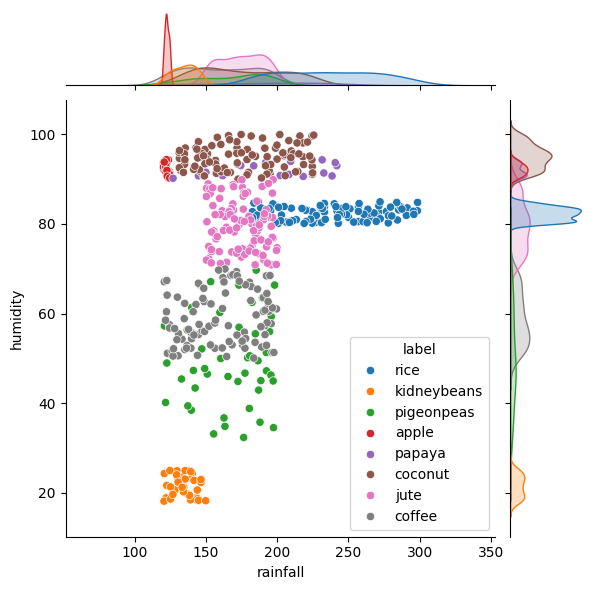

In [9]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

#### This graph correlates with average potassium (K) and average nitrogen (N) value (both>50).
#### These soil ingredients direcly affects nutrition value of the food. Fruits which have high nutrients typically has consistent potassium values.

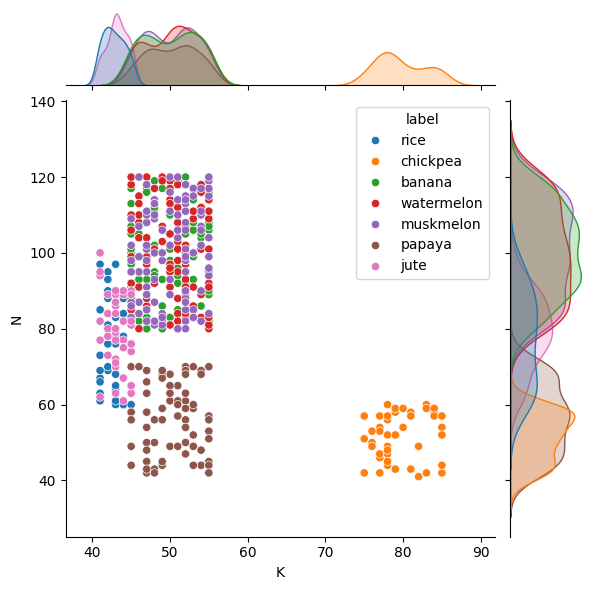

In [10]:
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")

#### We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preferred

<Axes: xlabel='ph', ylabel='label'>

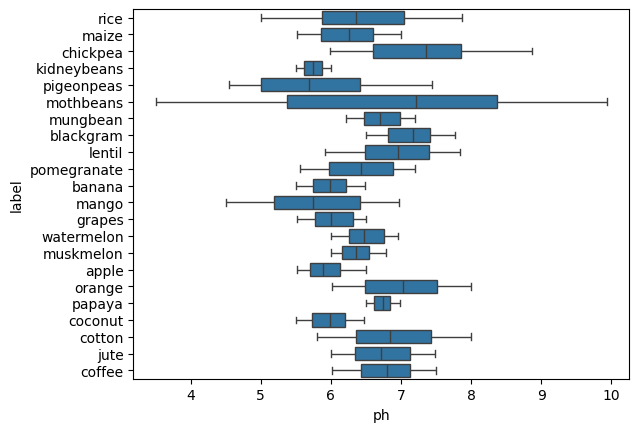

In [11]:
sns.boxplot(y='label',x='ph',data=df)

# DATA PRE-PROCESSING

### Let's make the data ready for machine learning model

In [14]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

**Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated.**

<Axes: >

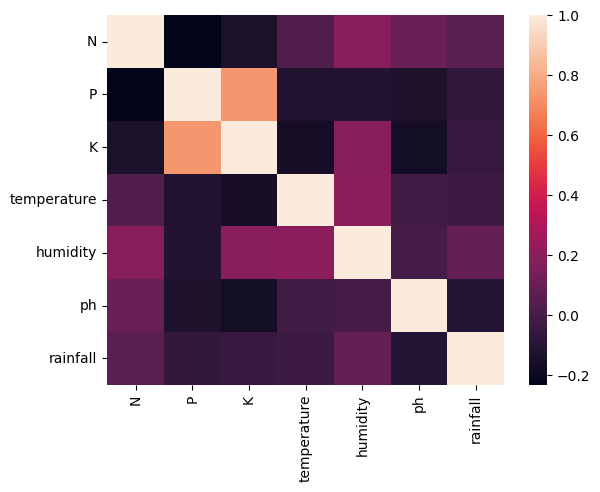

In [15]:
sns.heatmap(X.corr())

# FEATURE SCALING
**Feature scaling is required before creating training data and feeding it to the model.**

As we saw earlier, two of our features (temperature and ph) are gaussian distributed, therefore scaling them between 0 and 1 with MinMaxScaler.

In [18]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 796.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 2.6 MB/s eta 0:00:05
    --------------------------------------- 0.2/10.6 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.3/10.6 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.6 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/10.6 MB 2.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.6 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/10.6 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.6 MB 3.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/10.6 MB 4.0 MB/s eta 0:00:03
   --

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

# MODEL SELECTION

## Decision Tree Classifier for Crop prediction.
<hr>

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

print("Accuracy : ", round(dtc.score(X_test_scaled, y_test)*100, 2), "%")

Accuracy :  98.55 %


### Let's visualize the import features which are taken into consideration by decision trees.

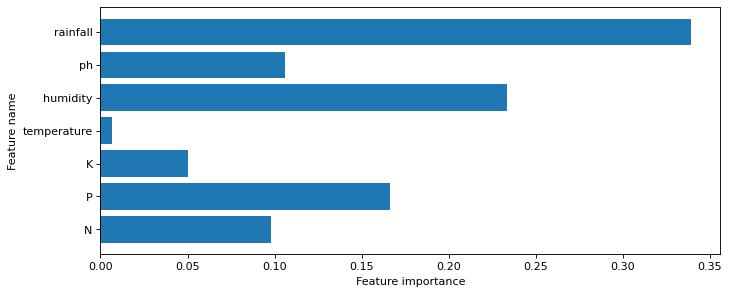

In [21]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), dtc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

### Confusion Matrix

<Axes: >

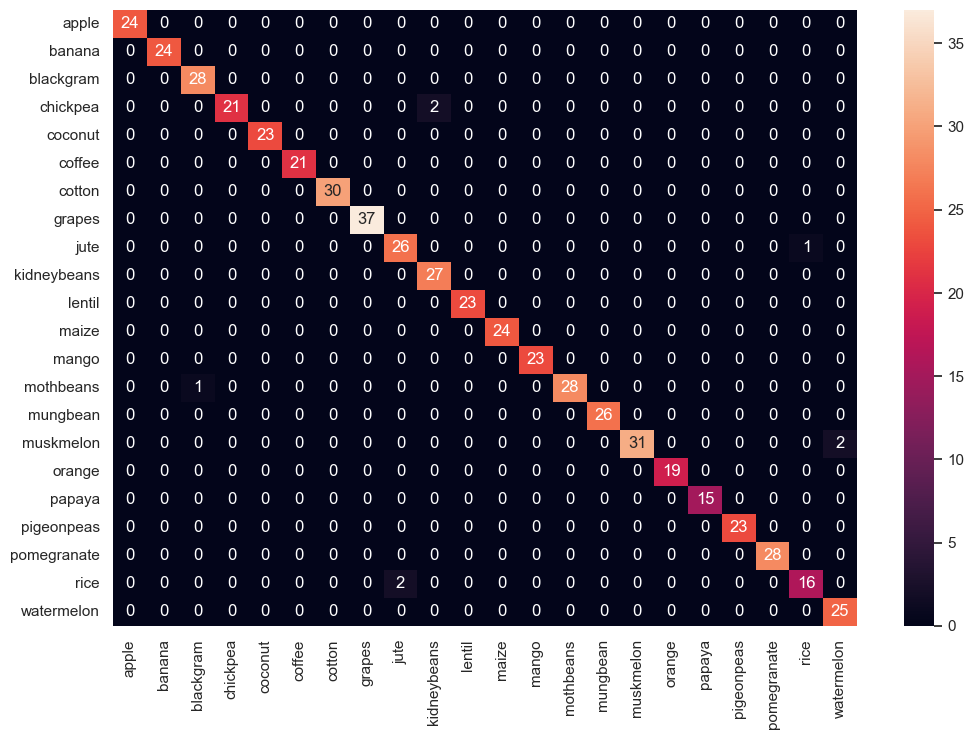

In [22]:
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(y_test, dtc.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12})

## Conclusion

We can see that our Decision Tree Classifier model predicts crops with 98.55% accuracy on test data, which is a very good amount of evaluation.